## Support Vector Machine (SVM)

- SVM is a supervised machine learning model for classification tasks

- For two dimension (when we have two features), assume the target has two classes, the SVM obtains the best line that seperates two groups 

<img src="Images/svm_1.png" width="300" height="300">

<img src="Images/best_margin.png" width="300" height="300">

####  Question: which one of these lines is the best seperable? Why?

## What are Support Vectors in SVM?

Support vectors are the datapoints that lie closest to the decision boundary

<img src="Images/svm_2.png" width="300" height="300">

## Activity: We have a medical data

- Two features are given that are releted to brain chemistry:

    -Serotonin 
    
    -Dopamine
    
- The target shows the brain health, which indicates having or not having depression

In [5]:
import pandas as pd

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)

In [6]:
df

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


## Lets build our X_train and Y_train arrays

In [13]:
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))
X_train

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [17]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


## Assign color and label to each target class

In [26]:
color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls
        

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [ ]:
label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

## Scatter plot of data with labels

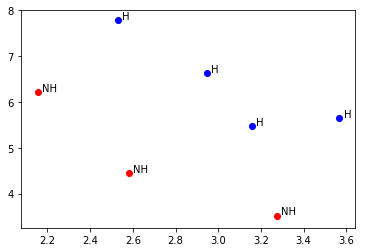

In [52]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

## Activity: Obtain the best line that separate these two groups

In [180]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

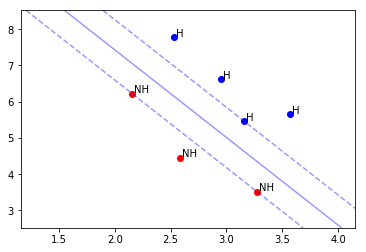

In [186]:
plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [183]:
# Number of Support Vectors for each class:

svm_classifier.n_support_

array([2, 1], dtype=int32)

In [184]:
# What are those Support Vectors:

svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [173]:
weight=svm_classifier.coef_
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[1.2115998  0.77184556]]
[-7.68349845]


## Am I healthy?

In [174]:
svm_classifier.predict([[3,6]])

array([1])

Good, I am not depressed :)

## Activity: SVM training, obtain its support vectors, visualize the decision boundary and check SVM performance

Task: Follow the steps in

https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html

1- Create the dataset

2- Define the SVM model as the classifier 

3- Fit the SVM with training dataset

4- Obtain its support vectors 

5- Obtain the score of the trained SVM model

## Handling data that is not linearly separable

Based on the dataset, it is possible that can not find a line that separates the two classes


<img src="Images/svm_3.png" width="500" height="500">



## What if even polynomial can not separate the two groups?

<img src="Images/why_rbf_kernel.png" width="500" height="500">

## Solution: Use RBF as the Kernel

## Kernels in SVM and their parameters:

Type of kernels:

1- Linear

2- Polynomial

3- Gaussian (RBF)

There are two parameters for these: gamma (for RBF only) and C (for all of them)

Read these: 
    
https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html
    
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

## Activity: what if the classes be unbalanced

Follow the steps here:
http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

Compare the results with and without considering class balances in SVM

## All the codes together 

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

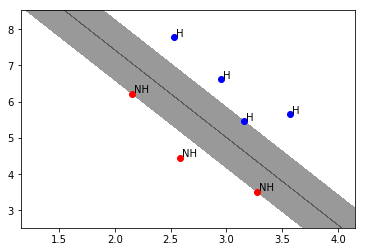

In [17]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)


X1=df['X1']
X2=df['X2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values


svm_classifier = svm.SVC(kernel='linear',C=10)

# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=10)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Apply different SVM kernels, (linear, polynomial or RBF) to obtain the best classifier for SVM_Dataset2.csv

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

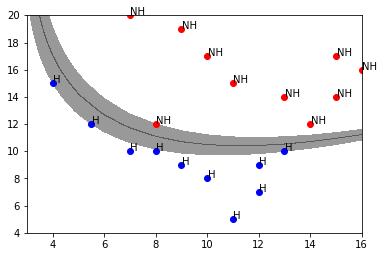

In [20]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset2.csv')


X1=df['x1']
X2=df['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values

# svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier = svm.SVC(kernel='poly', C=10)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_